# Preprocessing


In [531]:
import warnings
warnings.filterwarnings('ignore')

In [532]:
import pydot_ng as pydot
pydot.InvocationException(1)

pydot_ng.InvocationException(1)

In [533]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.losses import BinaryCrossentropy
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot  as plt
import keras_tuner as kt


In [534]:
Stock = pd.read_csv('Dataset/5657.KL.csv')
Stock.head()
display(Stock)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-07,2.307525,2.307525,2.261831,2.284678,2.284678,2121436
1,2014-04-08,2.284678,2.299909,2.261831,2.261831,2.261831,899338
2,2014-04-09,2.276453,2.389468,2.276453,2.389468,2.389468,1111175
3,2014-04-10,2.381396,2.454049,2.349106,2.454049,2.454049,1844898
4,2014-04-11,2.445976,2.462121,2.389468,2.462121,2.462121,1692034
...,...,...,...,...,...,...,...
2461,2024-04-01,0.240000,0.250000,0.240000,0.245000,0.245000,799700
2462,2024-04-02,0.245000,0.250000,0.240000,0.245000,0.245000,603900
2463,2024-04-03,0.245000,0.250000,0.245000,0.250000,0.250000,918100
2464,2024-04-04,0.245000,0.280000,0.245000,0.280000,0.280000,17575500


In [535]:
# Calculation of historical moving averages of closing price (10 and 30 days of trading)
def MA(df, period):
    MA = pd.Series(df['Close'].rolling(period, min_periods=period).mean(), name='MA_' + str(period))
    return MA

Stock['MA10'] = MA(Stock, 10)
Stock['MA30'] = MA(Stock, 30)

#calculation of exponential moving average of closing price (10 and 30 days of trading)
def EMA(df, period):
    EMA = pd.Series(df['Close'].ewm(span=period, min_periods=period).mean(), name='EMA_' + str(period))
    return EMA

Stock['EMA10'] = EMA(Stock, 10)
Stock['EMA30'] = EMA(Stock, 30)


#Calculation of closing price momentum (10 and 30 days of trading)
def MOM(df, period):   
    MOM = pd.Series(df.diff(period), name='Momentum_' + str(period))   
    return MOM

Stock['MOM10'] = MOM(Stock['Close'], 10)
Stock['MOM30'] = MOM(Stock['Close'], 30)

In [536]:
Stock.head(40)

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA30,EMA10,EMA30,MOM10,MOM30
0,2014-04-07,2.307525,2.307525,2.261831,2.284678,2.284678,2121436,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-04-08,2.284678,2.299909,2.261831,2.261831,2.261831,899338,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-04-09,2.276453,2.389468,2.276453,2.389468,2.389468,1111175,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-04-10,2.381396,2.454049,2.349106,2.454049,2.454049,1844898,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-04-11,2.445976,2.462121,2.389468,2.462121,2.462121,1692034,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-04-14,2.445976,2.478266,2.405613,2.445976,2.445976,1788782,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-04-15,2.421759,2.510556,2.421759,2.510556,2.510556,847441,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-04-16,2.510556,2.583209,2.502484,2.583209,2.583209,1334401,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-04-17,2.575137,2.615499,2.534774,2.575137,2.575137,1652641,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-04-18,2.558992,2.583209,2.550919,2.583209,2.583209,626197,2.455023,NaN,2.509232,NaN,NaN,NaN


In [537]:
# Creating two columns SMA and LMA to label our dataset
# SMA (Short Moving Average)- The average of the closing price from the next five days in the future
# LMA (Long Moving Average)- The average of the closing price from the last ten days and the next five days in the future

full_data = Stock
full_data['SMA'] = ""
full_data['LMA'] = ""

for ind in range(0, (full_data.shape[0]-5)):
    sma_frame = full_data['Close'].iloc[ind+1:ind+6]
    full_data['SMA'].iloc[ind] = sma_frame.mean()
  
    lma_frame_one = full_data['Close'].iloc[ind-10:ind]
    lma_frame_two = full_data['Close'].iloc[ind+1:ind+6]

    if (lma_frame_one.sum() == 0):
        full_data['LMA'].iloc[ind] = np.NaN
    else: 
        full_data['LMA'].iloc[ind] = (lma_frame_one.sum() + lma_frame_two.sum())/15

full_data['SMA'] = full_data['SMA'].replace('', np.NaN)
full_data['LMA'] = full_data['LMA'].replace('', np.NaN)

#Dropping any empty fields of data
full_data = full_data.dropna(axis=0)
print(full_data.head())

          Date      Open      High       Low     Close  Adj Close   Volume  \
30  2014-05-21  2.179583  2.203800  2.147292  2.163438   2.163438  3229718   
31  2014-05-22  2.163438  2.163438  2.106930  2.147292   2.147292  4455108   
32  2014-05-23  2.147292  2.163438  2.115002  2.131147   2.131147  3028666   
33  2014-05-26  2.139220  2.155365  2.115002  2.155365   2.155365  2398504   
34  2014-05-27  2.163438  2.163438  2.090785  2.098857   2.098857  5215093   

        MA10      MA30     EMA10     EMA30     MOM10     MOM30       SMA  \
30  2.291791  2.402435  2.273309  2.352537 -0.250248 -0.121240  2.127918   
31  2.268380  2.398617  2.250359  2.337518 -0.234104 -0.114539  2.119846   
32  2.244163  2.390007  2.228656  2.322546 -0.242176 -0.258321  2.108544   
33  2.223174  2.380050  2.215316  2.310514 -0.209886 -0.298684  2.092399   
34  2.198149  2.367942  2.194122  2.295394 -0.250249 -0.363264  2.087556   

         LMA  
30  2.253850  
31  2.234476  
32  2.215102  
33  2.193575  

In [538]:
#Creating target class - Signal
# The signal on a given trading day represents either 1-Buy or 0-Sell 
# The signal is calculated by comparing the future SMA and intermediate LMA
labelled_data = full_data
labelled_data['signal'] = np.where(labelled_data['SMA'] > labelled_data['LMA'], 1.0, 0.0)

#Dropping the SMA and LMA columns to avoid data leakage
labelled_data  = labelled_data.drop(columns = ['SMA', 'LMA'])
print(labelled_data.head(30))

          Date      Open      High       Low     Close  Adj Close    Volume  \
30  2014-05-21  2.179583  2.203800  2.147292  2.163438   2.163438   3229718   
31  2014-05-22  2.163438  2.163438  2.106930  2.147292   2.147292   4455108   
32  2014-05-23  2.147292  2.163438  2.115002  2.131147   2.131147   3028666   
33  2014-05-26  2.139220  2.155365  2.115002  2.155365   2.155365   2398504   
34  2014-05-27  2.163438  2.163438  2.090785  2.098857   2.098857   5215093   
35  2014-05-28  2.098857  2.115002  2.058495  2.106930   2.106930   3746532   
36  2014-05-29  2.090785  2.123075  2.074640  2.106930   2.106930   6209577   
37  2014-05-30  2.090785  2.147292  2.058495  2.074640   2.074640  46673842   
38  2014-06-02  2.090785  2.098857  2.018132  2.074640   2.074640  18551680   
39  2014-06-03  2.066567  2.082712  2.042350  2.074640   2.074640   3659819   
40  2014-06-04  2.058495  2.058495  2.026205  2.042350   2.042350   4078275   
41  2014-06-05  2.034277  2.034277  1.993914  1.9939

In [539]:
# Creating the MinMaxScaler Object
scaler = MinMaxScaler()

temp = labelled_data.drop(['Date', 'signal'], axis=1)
cols = temp.columns

#Creating scaled data
temp = scaler.fit_transform(temp)

#Generating input_df which will be used for model training and predictions
input_df = pd.concat([labelled_data['Date'],pd.DataFrame(temp, columns = cols),
                      labelled_data['signal']], 
                      axis=1, ignore_index=False)

input_df = input_df.dropna(axis=0)
print(input_df.head())
print(input_df.tail())

          Date      Open      High       Low     Close  Adj Close    Volume  \
30  2014-05-21  0.779209  0.758148  0.778510  0.756648   0.756648  0.002027   
31  2014-05-22  0.763559  0.745906  0.775305  0.756648   0.756648  0.001102   
32  2014-05-23  0.760429  0.742845  0.772101  0.744291   0.744291  0.001585   
33  2014-05-26  0.747909  0.742845  0.759283  0.753558   0.753558  0.002061   
34  2014-05-27  0.760429  0.745906  0.765692  0.756648   0.756648  0.001171   

        MA10      MA30     EMA10     EMA30     MOM10     MOM30  signal  
30  0.777853  0.793121  0.784797  0.818580  0.470953  0.347175     0.0  
31  0.778495  0.791694  0.785363  0.818013  0.470953  0.360529     0.0  
32  0.779138  0.790048  0.783465  0.816607  0.470953  0.347175     0.0  
33  0.780423  0.788402  0.783683  0.815952  0.490318  0.347175     0.0  
34  0.781387  0.787634  0.784452  0.815558  0.480636  0.400588     0.0  
            Date      Open      High       Low     Close  Adj Close    Volume  \
2426  

In [540]:
# Splitting entire data to create Training and Testing Data
# We will need to split the training and testing data into equivalent 
# time steps to train the Model

# Creating Training and Testing indices
train_data_size = int((0.7)*(input_df.shape[0]))
test_data_size = int(input_df.shape[0] - train_data_size)

# Allocating data instances to training and testing sets, excluding the date
train_data = input_df.iloc[0:train_data_size,1:]
test_data = input_df.iloc[train_data_size:input_df.shape[0],1:]


full_training_data = train_data # Used during model prediction
full_test_data = test_data  # Used during model prediction

# Creating numpy arrays from dataframes for future processing
train_data = np.array(train_data)
test_data = np.array(test_data)

print(train_data.shape)
print(test_data.shape)

(1680, 13)
(721, 13)


In [541]:
# Creating X_train and y_train
# As an example, this function looks back at five days of trading:
# X - Consists of all features excluding signal from last 5 days 
# y - Consists of signal from one day ahead

X_train = []
y_train = []

time_step = 5
label_col = (train_data.shape[1]-1)

for i in range(time_step, train_data.shape[0]):
    X_train.append(train_data[i-time_step:i,:label_col])
    y_train.append(train_data[i,label_col])
    
X_train, y_train = np.array(X_train), np.array(y_train)

print('\nShapes of X_train and Y_train:\n')
print(X_train.shape)
print(y_train.shape)

print('\nFirst Element in X_train and Y_train:\n')
print(X_train[0])
print(y_train[0])


Shapes of X_train and Y_train:

(1675, 5, 12)
(1675,)

First Element in X_train and Y_train:

[[0.7792093  0.75814844 0.77850989 0.75664752 0.75664752 0.00202735
  0.77785284 0.79312089 0.78479736 0.81857954 0.47095286 0.34717526]
 [0.76355912 0.74590592 0.77530528 0.75664752 0.75664752 0.00110196
  0.7784954  0.79169424 0.78536325 0.81801271 0.47095286 0.36052895]
 [0.76042932 0.74284511 0.77210066 0.74429113 0.74429113 0.0015846
  0.77913796 0.79004809 0.78346549 0.81660726 0.47095286 0.34717526]
 [0.74790894 0.74284511 0.75928299 0.75355833 0.75355833 0.00206121
  0.78042308 0.78840194 0.78368333 0.81595176 0.49031762 0.34717526]
 [0.76042932 0.74590592 0.76569182 0.75664752 0.75664752 0.00117057
  0.78138694 0.78763375 0.78445177 0.81555838 0.48063584 0.40058754]]
0.0


In [542]:
# Creating X_test and y_test
# As an example, this function looks back at five days of trading:
# X - Consists of all features excluding signal from last 5 days 
# y - Consists of signal from one day ahead

X_test = []
y_test = []

# Gathering the last five days of training data as this 
# will be used to predict the first few labels in y_test
last_5_days = full_training_data.tail()
test_data_df = pd.concat([last_5_days, full_test_data], ignore_index=True)

for i in range(time_step, test_data_df.shape[0]):
    X_test.append(test_data_df.iloc[i-time_step:i,:label_col])
    y_test.append(test_data_df.iloc[i, label_col])

X_test, y_test = np.array(X_test), np.array(y_test)
print('\nShapes of X_test and Y_test:\n')
print(X_test.shape)
print(y_test.shape)

print('\nFirst Element in X_test and Y_test:\n')
print(X_test[0])
print(y_test[0])



Shapes of X_test and Y_test:

(721, 5, 12)
(721,)

First Element in X_test and Y_test:

[[0.07366979 0.07203707 0.07343665 0.07461818 0.07461818 0.01398069
  0.066664   0.0536309  0.06579253 0.05531261 0.50556235 0.52589273]
 [0.07560847 0.07203707 0.07542143 0.0727049  0.0727049  0.01074397
  0.06825597 0.05485442 0.06641606 0.05621735 0.49956521 0.52175743]
 [0.07560847 0.0777242  0.07542143 0.08035804 0.08035804 0.03796014
  0.07084293 0.05600996 0.06838839 0.05759838 0.5295509  0.51762214]
 [0.07948583 0.07582849 0.0774062  0.07461818 0.07461818 0.01403726
  0.0728329  0.05689361 0.06890549 0.05848932 0.51155948 0.50108097]
 [0.07560847 0.07203707 0.0694671  0.06696504 0.06696504 0.03633095
  0.0734299  0.05764132 0.0678664  0.05878813 0.46957952 0.49281038]]
1.0


In [543]:
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your training data
# You can adjust the test_size parameter to control the proportion of the dataset to include in the test split
# For example, setting test_size=0.2 means that 20% of the data will be used for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now X_train and y_train are used for training, and X_val and y_val are used for validation

# Model Training


In [544]:
# Model definition
def build_model():

    model = Sequential()

    model.add(LSTM(units = 30, activation = 'relu',input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
   
    model.add(Dense(units = 10, activation = 'relu'))
           
    model.add(Dense(units = 1, activation = 'sigmoid'))
   
    print(model.summary())

    return model

# Model Compile
def compile_model(model):

    met = [keras.metrics.BinaryAccuracy(name='accuracy'),keras.metrics.Precision(name='precision'),
                keras.metrics.Recall(name='recall'), keras.metrics.AUC(name='auc')]
    
    model.compile(optimizer='adam', loss = BinaryCrossentropy(), metrics = met)

    return model

# Model Training
def train_model(model, X_train, Y_train):
    
    batch_size = 32
    epochs = 80

    #Capturing the unique counts of 0 and 1 signal classes
    (unique,counts) = np.unique(Y_train, return_counts=True)
    frequencies = np.asarray((unique, counts)).T

    neg = frequencies[0][1]
    pos= frequencies[1][1]
    total = neg+pos

    #Calculating weights for teh two binary classes
    weight_for_0 = (1 / neg)*(total)/2.0 
    weight_for_1 = (1 / pos)*(total)/2.0
    
    #Defining parameters for the class weights
    cw = {0: weight_for_0, 1: weight_for_1}
       
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose = 1)

    return model, history

# Model Evaluation and Results Evaluation
def eval_model(m, test_X, test_y):

    y_pred = m.predict(test_X)
    y_pred = y_pred.flatten()
    
    # Round predictions to two decimal places
    y_pred_rounded = np.round(y_pred, decimals=2)
    
    print('PREDICTED SIGNAL: \n')
    print(y_pred_rounded)

    def map_signal(prediction):
        if prediction <= 0.2:
            return 'Strong Sell'
        elif prediction <= 0.4:
            return 'Sell'
        elif prediction <= 0.6:
            return 'Neutral'
        elif prediction <= 0.8:
            return 'Buy'
        else:
            return 'Strong Buy'

# Apply the function to each rounded prediction
    signals = [map_signal(pred) for pred in y_pred_rounded]

# Print the signals
    print('PREDICTED SIGNAL: \n')
    print('Head of the signal array:')
    print(signals[:10])

# Print the tail of the array
    print('\nTail of the signal array:')
    print(signals[-10:])
    
    print('CONFUSION MATRIX: \n')
    unique_label = np.unique([test_y, y_pred.round()])
    cmtx = pd.DataFrame(
    confusion_matrix(test_y, y_pred.round(), labels=unique_label), 
    index=['  true:{:}'.format(x) for x in unique_label], 
    columns=['pred:{:}'.format(x) for x in unique_label])
    print(cmtx)


    print('\nCLASSFICATION REPORT: \n')
    print(classification_report(test_y, y_pred.round()))

    # Visualising the results
    print('\nMODEL PREDICTIONS VS ACTUAL: \n')
    plt.figure(figsize=(14,5))
    plt.plot(test_y, color = 'red', label = 'Actual Buy/Sell Signal ')
    plt.plot(y_pred, color = 'blue', label = 'Predicted Buy/Sell Signal')
    plt.title('5657.KL LSTM Stock Buy/Sell Prediction')
    plt.xlabel('Time')
    plt.ylabel('5657.KL Stock Signal')
    plt.legend(loc='best')
    plt.show()
   
    return None

In [545]:
# Class Imbalance
(unique,counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Training Instances with Class 0:  ' + str(frequencies[0][1]))
print('Training Instances with Class 1:  ' + str(frequencies[1][1]))
total = int(frequencies[0][1]) + int(frequencies[1][1])
print('Total Training instances:  '+str(total))

Training Instances with Class 0:  878.0
Training Instances with Class 1:  462.0
Total Training instances:  1340


In [546]:
# Executing model building, compiling and training 
# During model training, we print the 
model = build_model()
model = compile_model(model)
model, history = train_model(model, X_train, y_train)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,481 (21.41 KB)

 Trainable params: 5,481 (21.41 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 29s 96ms/step - accuracy: 0.6415 - auc: 0.5301 - loss: 0.6736 - precision: 0.4003 - recall: 0.1258
Epoch 2/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6617 - auc: 0.5364 - loss: 0.6467 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6640 - auc: 0.5279 - loss: 0.6404 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6567 - auc: 0.5069 - loss: 0.6432 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6894 - auc: 0.5353 - loss: 0.6221 - precision: 0.3781 - recall: 0.0112     
Epoch 6/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6851 - auc: 0.5797 - loss: 0.6247 - precision: 0.8994 - recall: 0.0551     
Epoch 7/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6718 - auc: 0.6239 - loss: 0.6179 - precision: 0.6941 - recall: 0.0504       
Epoc


MODEL TRAINING RESULTS



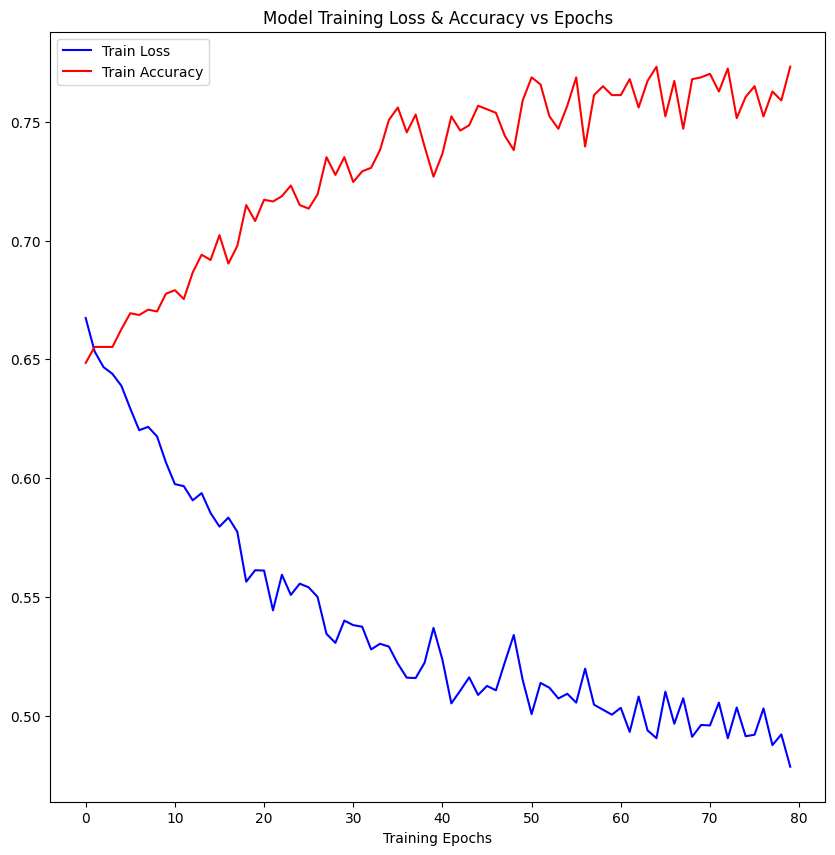

In [547]:
# Plotting Training loss vs Epochs 
def plot_curves(history): 
    
    print('\nMODEL TRAINING RESULTS\n')
    plt.figure(figsize=(10,10))
    plt.plot(history.history['loss'], color = 'blue')
    plt.plot(history.history['accuracy'], color = 'red')
    plt.title('Model Training Loss & Accuracy vs Epochs')
    plt.xlabel('Training Epochs')
    plt.legend(['Train Loss', 'Train Accuracy'], loc='best')
    plt.show()
        
plot_curves(history)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
PREDICTED SIGNAL: 

[0.76 0.72 0.62 0.68 0.77 0.83 0.83 0.73 0.72 0.72 0.72 0.65 0.68 0.39
 0.46 0.57 0.69 0.72 0.71 0.7  0.71 0.71 0.73 0.64 0.29 0.12 0.11 0.13
 0.13 0.12 0.1  0.09 0.08 0.11 0.14 0.14 0.11 0.09 0.09 0.08 0.07 0.06
 0.05 0.07 0.09 0.1  0.09 0.1  0.11 0.13 0.17 0.28 0.23 0.24 0.25 0.3
 0.36 0.46 0.3  0.21 0.23 0.22 0.23 0.21 0.16 0.16 0.17 0.17 0.15 0.11
 0.11 0.09 0.1  0.1  0.1  0.1  0.11 0.1  0.12 0.19 0.21 0.26 0.25 0.22
 0.23 0.22 0.22 0.19 0.23 0.33 0.31 0.29 0.3  0.31 0.3  0.31 0.23 0.21
 0.27 0.32 0.38 0.42 0.6  0.67 0.71 0.77 0.76 0.76 0.76 0.73 0.72 0.72
 0.71 0.69 0.63 0.46 0.49 0.47 0.45 0.38 0.38 0.37 0.27 0.22 0.18 0.09
 0.1  0.11 0.11 0.13 0.18 0.29 0.42 0.5  0.6  0.58 0.54 0.67 0.67 0.64
 0.58 0.45 0.37 0.38 0.39 0.44 0.53 0.52 0.49 0.4  0.24 0.12 0.11 0.09
 0.1  0.12 0.13 0.12 0.11 0.13 0.14 0.16 0.13 0.11 0.09 0.09 0.09 0.08
 0.09 0.1  0.12 0.16 0.2  0.25 0.28 0.35 0.37 0.43 0.45 0.3  0.21 0.18
 0.19 0.27 0.35 0.

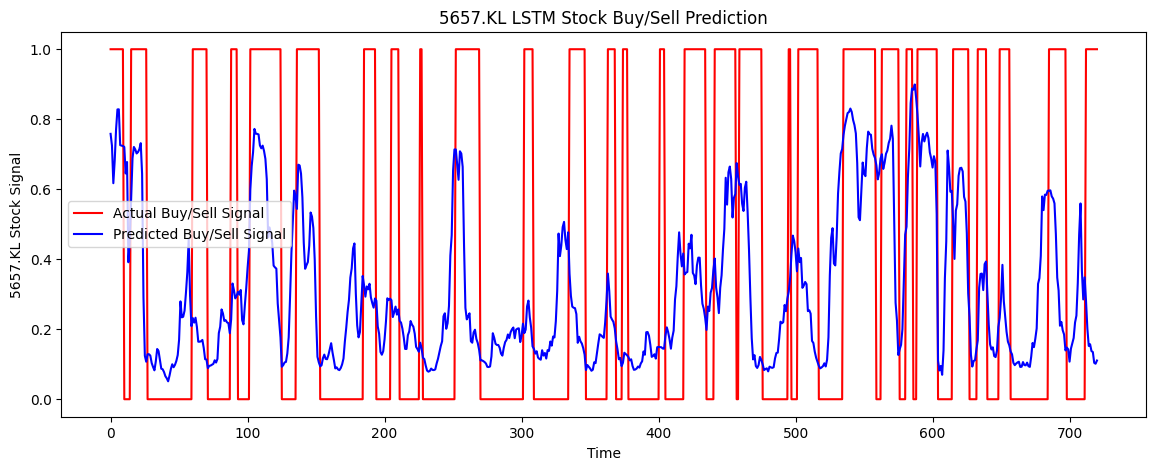

In [548]:
# Testing Initial Model 
# Printing Confusion Matrix, Classification Report, and Visualizing Predicted Signal
tf.keras.utils.plot_model(model, to_file='img/5657.KL-LSTM.png', show_shapes=True)
eval_model(model, X_test, y_test)

In [549]:

def model_builder(hp):

    #Defining Model 
    hyper_model = Sequential()

    hyper_model.add(LSTM(units = hp.Int('input_layer', 10, 90, step=10), activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2])))
    hyper_model.add(Dropout(hp.Choice('Drop1', values = [0.1,0.2,0.3])))
        
    hyper_model.add(Dense(units = hp.Choice('hidden_1', values = [10,20,30,60,80,100]), activation = 'relu'))
        
    hyper_model.add(Dense(units = 1, activation = 'sigmoid'))
        
    hyper_model.compile(optimizer = Adam(learning_rate=hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])),
                        loss = BinaryCrossentropy(), metrics=['accuracy'])
        
    return hyper_model

In [550]:
# Defining Random Search Tuner and performing hyperparameter tuning
obj = kt.Objective("loss", direction="min")
tuner = kt.tuners.RandomSearch(model_builder, objective=obj, max_trials=25, seed=42, overwrite = True)

tuner.search(X_train, y_train, epochs=80, validation_data=(X_val, y_val))

# Get the optimal hyperparameter values for model layers
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. 

The optimal number of units in the input layer is {best_hps.get('input_layer')}. 
The optimal amount of dropout in the input layer is {best_hps.get('Drop1')}. 
The optimal number of units in the first hidden layer is {best_hps.get('hidden_1')}. 
The optimal learning rate is {best_hps.get('learning_rate')}.
""")


Trial 25 Complete [00h 00m 26s]
loss: 0.48934686183929443

Best loss So Far: 0.46276065707206726
Total elapsed time: 00h 14m 13s

The hyperparameter search is complete. 

The optimal number of units in the input layer is 50. 
The optimal amount of dropout in the input layer is 0.1. 
The optimal number of units in the first hidden layer is 30. 
The optimal learning rate is 0.001.



In [551]:
#Step One
model_Two = tuner.hypermodel.build(best_hps)
history = model_Two.fit(X_train, y_train, epochs=100)

acc_per_epoch = history.history['accuracy']
best_epoch = acc_per_epoch.index(max(acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5766 - loss: 0.6819
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6349 - loss: 0.6591
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6617 - loss: 0.6401
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6545 - loss: 0.6407
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6724 - loss: 0.6280
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6670 - loss: 0.6183
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6773 - loss: 0.6064
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6644 - loss: 0.6127
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6861 - loss: 0.5893
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7042 - loss: 0.5804
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7063 - loss: 0.5757
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

In [552]:
#Step Two
model_three = tuner.hypermodel.build(best_hps)

# Retrain the final model using the best number of epochs
tuned_history = model_three.fit(X_train, y_train, epochs=best_epoch)

Epoch 1/88
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6376 - loss: 0.6766
Epoch 2/88
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6513 - loss: 0.6542
Epoch 3/88
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6524 - loss: 0.6443
Epoch 4/88
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6721 - loss: 0.6271
Epoch 5/88
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6501 - loss: 0.6372
Epoch 6/88
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6481 - loss: 0.6291
Epoch 7/88
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6674 - loss: 0.6128
Epoch 8/88
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6871 - loss: 0.5922
Epoch 9/88
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6716 - loss: 0.5974
Epoch 10/88
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6974 - loss: 0.5838
Epoch 11/88
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6696 - loss: 0.6022
Epoch 12/88
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6903 - lo


MODEL TRAINING RESULTS



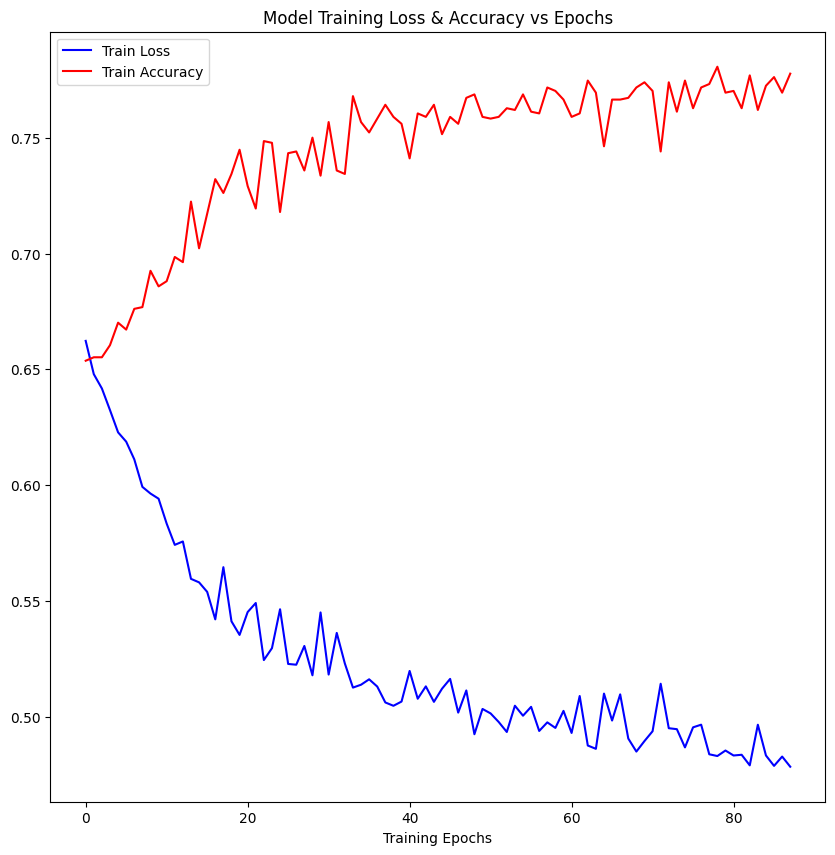

In [553]:
plot_curves(tuned_history)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7408 - loss: 0.5307
[test loss, test accuracy]: [0.5854125618934631, 0.7115117907524109]
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
PREDICTED SIGNAL: 

[0.85 0.81 0.69 0.75 0.83 0.9  0.9  0.8  0.79 0.81 0.8  0.67 0.76 0.54
 0.62 0.68 0.78 0.82 0.82 0.81 0.81 0.81 0.84 0.78 0.5  0.17 0.13 0.16
 0.18 0.17 0.14 0.12 0.11 0.15 0.22 0.21 0.16 0.12 0.12 0.11 0.09 0.09
 0.08 0.1  0.12 0.14 0.12 0.13 0.15 0.16 0.23 0.46 0.4  0.41 0.45 0.54
 0.61 0.71 0.56 0.37 0.44 0.41 0.44 0.39 0.29 0.29 0.29 0.3  0.24 0.17
 0.17 0.13 0.14 0.14 0.15 0.15 0.18 0.16 0.18 0.36 0.4  0.49 0.48 0.43
 0.4  0.33 0.42 0.32 0.42 0.58 0.54 0.44 0.33 0.52 0.48 0.42 0.31 0.35
 0.42 0.52 0.59 0.65 0.73 0.78 0.8  0.87 0.86 0.86 0.86 0.83 0.83 0.84
 0.82 0.81 0.78 0.7  0.71 0.7  0.68 0.61 0.63 0.62 0.49 0.4  0.29 0.13
 0.13 0.15 0.15 0.19 0.27 0.48 0.64 0.7  0.74 0.74 0.72 0.79 0.79 0.78
 0.74 0.66 0.61 0.62 0.63 0.67 0.73 0.73 0.72 0.67 0.46 0.18 0.15 0.13
 0.13 0.17 0.19 

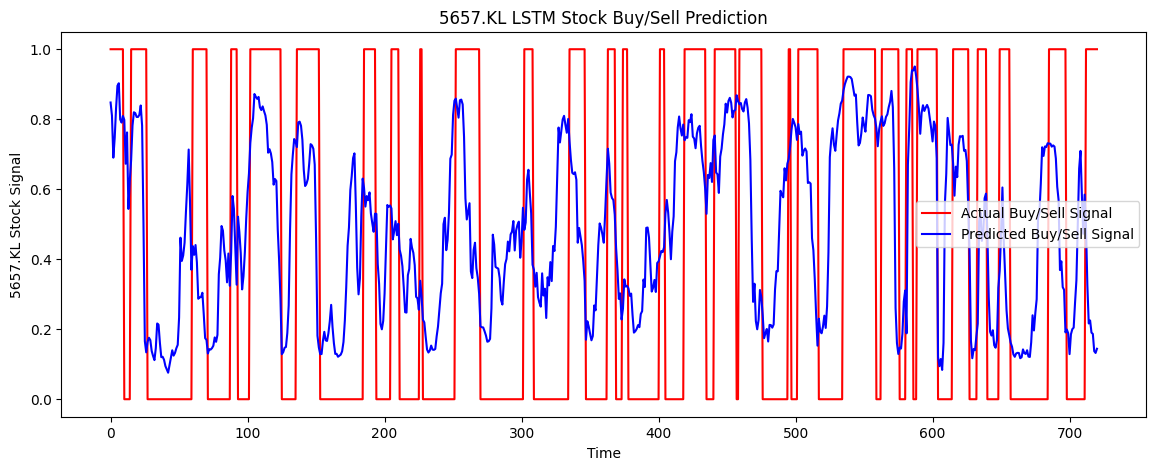

In [554]:
# Tuned Model Evaluation
# Printing Confusion Matrix, Classification Report, and Visualizing the Predicted Signal
eval_result = model_three.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

tf.keras.utils.plot_model(model_three, to_file='img/5657.KL-LSTM-Tuned.png', show_shapes=True)

eval_model(model_three, X_test, y_test)

In [555]:
from sklearn.model_selection import StratifiedKFold

# Define the number of folds for cross-validation
num_folds = 3

# Initialize the StratifiedKFold object
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

# Lists to store the performance metrics for each fold
val_acc_per_fold = []

# Perform cross-validation
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train), 1):
    print(f"Fold {fold}/{num_folds}:")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Build the model
    model = build_model()  # Assuming you have defined a function build_model() to create the model
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the training data of this fold
    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold))
    
    # Evaluate the model on the validation set of this fold
    _, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    print(f"Validation Accuracy: {val_accuracy}")
    val_acc_per_fold.append(val_accuracy)

# Print the average validation accuracy across all folds
average_val_accuracy = np.mean(val_acc_per_fold)
print(f"\nAverage Validation Accuracy: {average_val_accuracy}")

Fold 1/3:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,481 (21.41 KB)

 Trainable params: 5,481 (21.41 KB)

 Non-trainable params: 0 (0.00 B)

None
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7124 - loss: 0.5250 
Validation Accuracy: 0.7225950956344604
Fold 2/3:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,481 (21.41 KB)

 Trainable params: 5,481 (21.41 KB)

 Non-trainable params: 0 (0.00 B)

None
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7731 - loss: 0.4735 
Validation Accuracy: 0.7606263756752014
Fold 3/3:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 30)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,481 (21.41 KB)

 Trainable params: 5,481 (21.41 KB)

 Non-trainable params: 0 (0.00 B)

None
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7754 - loss: 0.4997 
Validation Accuracy: 0.7892376780509949

Average Validation Accuracy: 0.7574863831202189
